In [29]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
plt.rcParams['figure.figsize']=(20.0, 10.0)

In [30]:
PATH = 'https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/1.4.11_experimentation_guided_example/experiment_data_2_wks.csv'
experiment_data = pd.read_csv(PATH)

In [31]:
experiment_data.head(10)

,treatment_date,test,is_signed_up,signup_date
0,2016-04-01,0,0,NaN
1,2016-04-01,0,0,NaN
2,2016-04-01,0,0,NaN
3,2016-04-01,0,0,NaN
4,2016-04-01,0,0,NaN
5,2016-04-01,0,0,NaN
6,2016-04-01,1,1,2016-04-02
7,2016-04-01,0,0,NaN
8,2016-04-01,0,0,NaN
9,2016-04-01,0,0,NaN


In [32]:
#How large is each group?
print('test sample size:', sum(experiment_data.test))
print('control sample size:', len(experiment_data.test)-sum(experiment_data.test))
print('test proportion:', experiment_data.test.mean())

#What is the signup rate of test and control?
print()
print('test signup rate:', experiment_data[experiment_data.test == 1].is_signed_up.mean())
print('control signup rate:', experiment_data[experiment_data.test == 0].is_signed_up.mean())


#Is the experiment already significant?
print()
stats.ttest_ind(experiment_data[experiment_data.test == 1].is_signed_up,
                experiment_data[experiment_data.test == 0].is_signed_up)

test sample size: 3372
control sample size: 30241
test proportion: 0.10031832921786214

test signup rate: 0.13701067615658363
control signup rate: 0.14708508316523924



Ttest_indResult(statistic=-1.5711354292574262, pvalue=0.11616060761145311)

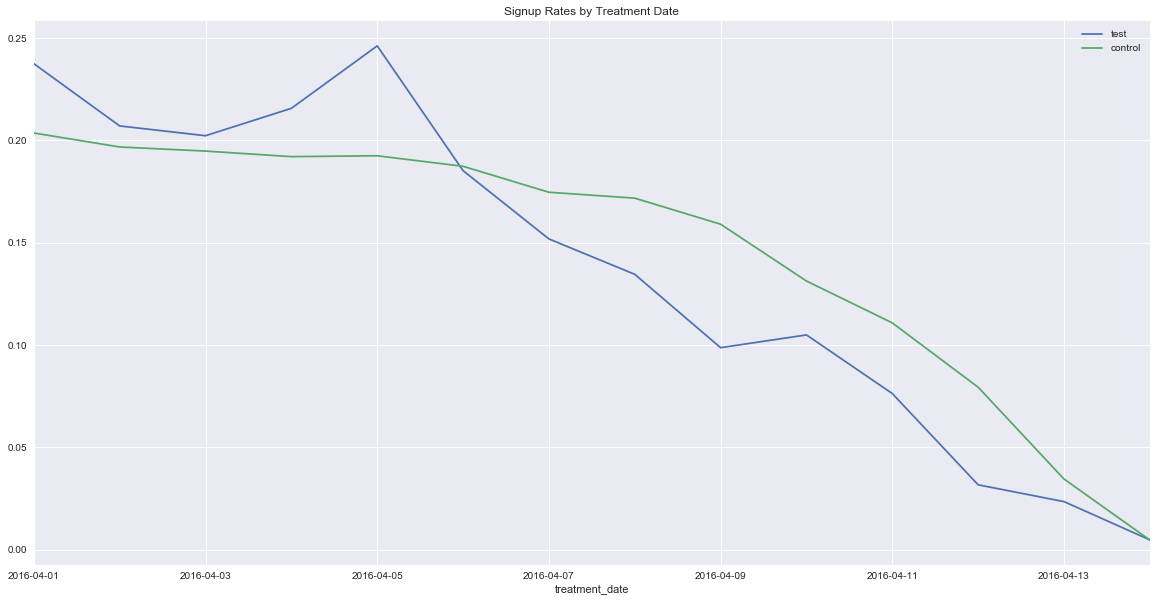

T-Test Results by Date
Ttest_indResult(statistic=1.171015382328547, pvalue=0.24172432121696255)
Ttest_indResult(statistic=0.39163213374090855, pvalue=0.69536307583404477)
Ttest_indResult(statistic=0.24114731791032132, pvalue=0.80946517427234477)
Ttest_indResult(statistic=1.0061466712652529, pvalue=0.31442818877672118)
Ttest_indResult(statistic=1.7950152227404037, pvalue=0.072795024323400598)
Ttest_indResult(statistic=-0.071422569493390833, pvalue=0.94306811838128202)
Ttest_indResult(statistic=-0.99645401324533001, pvalue=0.31911047625459077)
Ttest_indResult(statistic=-1.4059315672051254, pvalue=0.15989309224108991)
Ttest_indResult(statistic=-2.7727725116434869, pvalue=0.0055926512303104605)
Ttest_indResult(statistic=-1.301097855458891, pvalue=0.19332775805677105)
Ttest_indResult(statistic=-1.6243695706046337, pvalue=0.10443285596458776)
Ttest_indResult(statistic=-2.5595402548533168, pvalue=0.010550250694229046)
Ttest_indResult(statistic=-0.85179312629079196, pvalue=0.39442121215359549)

In [34]:
#Why does the test signup rate seem lower than the old message?

fig = experiment_data[experiment_data.test == 1][
    ['treatment_date', 'is_signed_up']].groupby('treatment_date').mean().plot()
experiment_data[experiment_data.test == 0][
    ['treatment_date', 'is_signed_up']].groupby('treatment_date').mean().plot(ax=fig)

plt.legend(['test', 'control'])
plt.title('Signup Rates by Treatment Date')
plt.show()

print('T-Test Results by Date')

for date in experiment_data.treatment_date.unique():
    dated_data = experiment_data[experiment_data.treatment_date == date]
    print(stats.ttest_ind(dated_data[dated_data.test == 1].is_signed_up,
                          dated_data[dated_data.test == 0].is_signed_up))